In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
bd = 'Cleaned_data'

In [3]:
mep_info6 = pd.read_csv(os.path.join(bd,'EP6_clean_data','mep_info_EP_6.csv'))
vote6 = pd.read_csv(os.path.join(bd,'EP6_clean_data','votes_EP_6.csv'))

mep_info7 = pd.read_csv(os.path.join(bd,'EP7_clean_data','mep_info_EP_7.csv'))
vote7 = pd.read_csv(os.path.join(bd,'EP7_clean_data','votes_EP_7.csv'))

mep_info8 = pd.read_csv(os.path.join(bd,'EP8_clean_data','mep_info_EP_8.csv'))
vote8 = pd.read_csv(os.path.join(bd,'EP8_clean_data','votes_EP_8.csv'))

mep_info9 = pd.read_csv(os.path.join(bd,'EP9_clean_data','mep_info_EP_9.csv'))
vote9 = pd.read_csv(os.path.join(bd,'EP9_clean_data','votes_EP_9.csv'))

In [4]:

all_unique_values = np.unique(vote9.values)

In [5]:
all_unique_values

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.53008e+05,
       2.53043e+05,         nan])

In [6]:
mep_info6

,MepId,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,Birthday,Gender
0,28469,Adamos,Adamou,Adamos ADAMOU,yes,Cyprus,Anorthotiko Komma Ergazomenou Laou - Aristera ...,GUE–NGL,2004-07-20,2009-12-31,1950-10-30,MALE
1,28302,Filip,Adwent,Filip ADWENT,no,Poland,Liga Polskich Rodzin,IND/DEM,2004-07-20,2005-06-26,1955-08-31,MALE
2,28975,Vittorio,AGNOLETTO,Vittorio AGNOLETTO,yes,Italy,Partito della Rifondazione Comunista - Sinistr...,GUE–NGL,2004-07-20,2009-12-31,1958-03-06,MALE
3,28367,Gabriele,Albertini,Gabriele ALBERTINI,yes,Italy,Forza Italia,EPP-ED,2004-07-20,2009-12-31,1950-07-06,MALE
4,28512,Jim,Allister,Jim ALLISTER,yes,United Kingdom,Traditional Unionist,NI,2004-07-20,2009-12-31,1953-04-02,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
935,95280,Alin Lucian,Antochi,Alin Lucian ANTOCHI,yes,Romania,Partidul Social Democrat,PES,2009-01-21,2009-12-31,1972-12-10,MALE
936,95281,Viorica,Dăncilă,Viorica DĂNCILĂ,yes,Romania,Partidul Social Democrat,PES,2009-01-21,2009-12-31,1963-12-16,FEMALE
937,95704,Ioan Lucian,Hămbășan,Ioan Lucian HĂMBĂȘAN,yes,Romania,Partidul Democrat-Liberal,EPP-ED,2009-03-01,2009-12-31,1976-01-11,MALE
938,96101,Daniel,Bautista,Daniel BAUTISTA,yes,Spain,Partido Popular,EPP-ED,2009-03-26,2009-12-31,1974-03-03,MALE


In [7]:

choose_columns = ['MepId','Country','EPG','Gender']

In [8]:
mep_info6 = mep_info6[choose_columns]
vote6 = pd.merge(vote6,mep_info6,on="MepId",how="left")

In [9]:
vote6

,MepId,VoteId,Vote,Country,EPG,Gender
0,28469,1,1,Cyprus,GUE–NGL,MALE
1,28302,1,5,Poland,IND/DEM,MALE
2,28975,1,3,Italy,GUE–NGL,MALE
3,28367,1,5,Italy,EPP-ED,MALE
4,28512,1,5,United Kingdom,NI,MALE
...,...,...,...,...,...,...
5827055,95280,6200,5,Romania,PES,MALE
5827056,95281,6200,4,Romania,PES,FEMALE
5827057,95704,6200,5,Romania,EPP-ED,MALE
5827058,96101,6200,4,Spain,EPP-ED,MALE


In [10]:
mep_info7 = mep_info7[choose_columns]
vote7 = pd.merge(vote7,mep_info7,on="MepId",how="left")

In [11]:
mep_info8 = mep_info8[choose_columns]
vote8 = pd.merge(vote8,mep_info8,on="MepId",how="left")

In [12]:
vote8

,MepId,VoteId,Vote,Country,EPG,Gender
0,124990,1,5,Sweden,NaN,MALE
1,124831,1,5,Italy,EFDD,FEMALE
2,124797,1,2,Italy,Greens–EFA,MALE
3,124811,1,5,Italy,EFDD,FEMALE
4,96897,1,2,United Kingdom,EFDD,MALE
...,...,...,...,...,...,...
8796211,196042,10276,5,Latvia,NaN,MALE
8796212,195454,10276,1,Belgium,NaN,MALE
8796213,111033,10276,1,Latvia,NaN,MALE
8796214,28299,10276,5,Poland,NaN,MALE


In [13]:
vote8

,MepId,VoteId,Vote,Country,EPG,Gender
0,124990,1,5,Sweden,NaN,MALE
1,124831,1,5,Italy,EFDD,FEMALE
2,124797,1,2,Italy,Greens–EFA,MALE
3,124811,1,5,Italy,EFDD,FEMALE
4,96897,1,2,United Kingdom,EFDD,MALE
...,...,...,...,...,...,...
8796211,196042,10276,5,Latvia,NaN,MALE
8796212,195454,10276,1,Belgium,NaN,MALE
8796213,111033,10276,1,Latvia,NaN,MALE
8796214,28299,10276,5,Poland,NaN,MALE


In [14]:
mep_info9 = mep_info9[choose_columns]
vote9 = pd.merge(vote9,mep_info9,on="MepId",how="left")

In [15]:
mep_info9

,MepId,Country,EPG,Gender
0,197490,Poland,EPP,FEMALE
1,189525,Bulgaria,EPP,MALE
2,124831,Italy,EPP,FEMALE
3,197826,Italy,IDG,MALE
4,197403,Malta,S&D,MALE
...,...,...,...,...
806,228286,Germany,S&D,MALE
807,229519,Netherlands,RE,FEMALE
808,230085,Italy,S&D,FEMALE
809,229839,Germany,S&D,MALE


In [16]:
vote9.Vote = vote9['Vote'].astype('Int64')

In [17]:
vote9

,MepId,VoteId,Vote,Country,EPG,Gender
0,840,1,5,Luxembourg,RE,MALE
1,1394,1,2,United Kingdom,RE,MALE
2,1854,1,3,Germany,S&D,FEMALE
3,1892,1,<NA>,NaN,NaN,NaN
4,1909,1,3,Germany,S&D,MALE
...,...,...,...,...,...,...
16171679,251324,18674,<NA>,NaN,NaN,NaN
16171680,251859,18674,2,NaN,NaN,NaN
16171681,251874,18674,1,NaN,NaN,NaN
16171682,253008,18674,<NA>,NaN,NaN,NaN


In [18]:
def recode(vote):
    match vote:
        case 0:
            return vote
        case 1:
            return vote
        case 2:
            return vote
        case 3:
            return vote
        case 4:
            return 4 
        case 5:
            return 4
        case 6:
            return 4
    return 0

In [19]:
vote6.Vote = vote6['Vote'].apply(recode)
vote7.Vote = vote7['Vote'].apply(recode)
vote8.Vote = vote8['Vote'].apply(recode)
vote9.Vote = vote9['Vote'].apply(recode)

In [20]:
vote6['Gender'] = vote6['Gender'].apply(lambda x: 'MALE' if x == 'NAP' else x)

In [21]:
vote6

,MepId,VoteId,Vote,Country,EPG,Gender
0,28469,1,1,Cyprus,GUE–NGL,MALE
1,28302,1,4,Poland,IND/DEM,MALE
2,28975,1,3,Italy,GUE–NGL,MALE
3,28367,1,4,Italy,EPP-ED,MALE
4,28512,1,4,United Kingdom,NI,MALE
...,...,...,...,...,...,...
5827055,95280,6200,4,Romania,PES,MALE
5827056,95281,6200,4,Romania,PES,FEMALE
5827057,95704,6200,4,Romania,EPP-ED,MALE
5827058,96101,6200,4,Spain,EPP-ED,MALE


In [22]:
vote6.to_csv(os.path.join('Results','votes_plotly_6.csv'),index=False)
vote7.to_csv(os.path.join('Results','votes_plotly_7.csv'),index=False)
vote8.to_csv(os.path.join('Results','votes_plotly_8.csv'),index=False)
vote9.to_csv(os.path.join('Results','votes_plotly_9.csv'),index=False)

In [23]:
vote6missing = vote6[vote6.Vote == 4]
vote7missing = vote7[vote7.Vote == 4]
vote8missing = vote8[vote8.Vote == 4]
vote9missing = vote9[vote9.Vote == 4]

In [24]:
vote6missing

,MepId,VoteId,Vote,Country,EPG,Gender
1,28302,1,4,Poland,IND/DEM,MALE
3,28367,1,4,Italy,EPP-ED,MALE
4,28512,1,4,United Kingdom,NI,MALE
7,28620,1,4,Latvia,ALDE,MALE
8,28363,1,4,Italy,ALDE,MALE
...,...,...,...,...,...,...
5827055,95280,6200,4,Romania,PES,MALE
5827056,95281,6200,4,Romania,PES,FEMALE
5827057,95704,6200,4,Romania,EPP-ED,MALE
5827058,96101,6200,4,Spain,EPP-ED,MALE


In [25]:
value_counts6 = vote6missing['EPG'].value_counts()
value_counts7 = vote7missing['EPG'].value_counts()
value_counts8 = vote8missing['EPG'].value_counts()
value_counts9 = vote9missing['EPG'].value_counts()

In [26]:
def proportions_plot(df, ep_number):
    epg_counts = df['EPG'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['EPG'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by EPG in EP{ep_number}")
    plt.xlabel('EPG')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_EPG_EP{ep_number}.png'))
    plt.show()

In [27]:
def genders_plot(df, ep_number):
    epg_counts = df['Gender'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Gender'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by EPG in EP{ep_number}")
    plt.xlabel('Gender')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_gender_EP{ep_number}.png'))
    plt.show()

In [28]:
def countries_plot(df, ep_number):
    epg_counts = df['Country'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Country'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    plt.figure(figsize=(10, 6))
    proportions.plot(kind='bar')
    plt.title(f"Proportion of missing votes by country in EP{ep_number}")
    plt.xlabel('Country')
    plt.ylabel('Proportion of missing votes')
    plt.savefig(os.path.join('Graphs',f'proportion_of_missing_votes_by_country_EP{ep_number}.png'))
    plt.show()

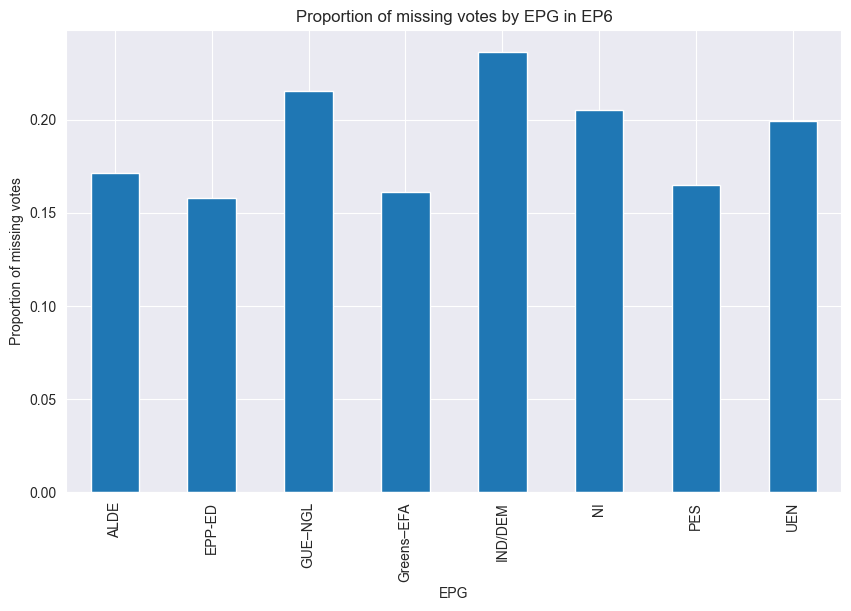

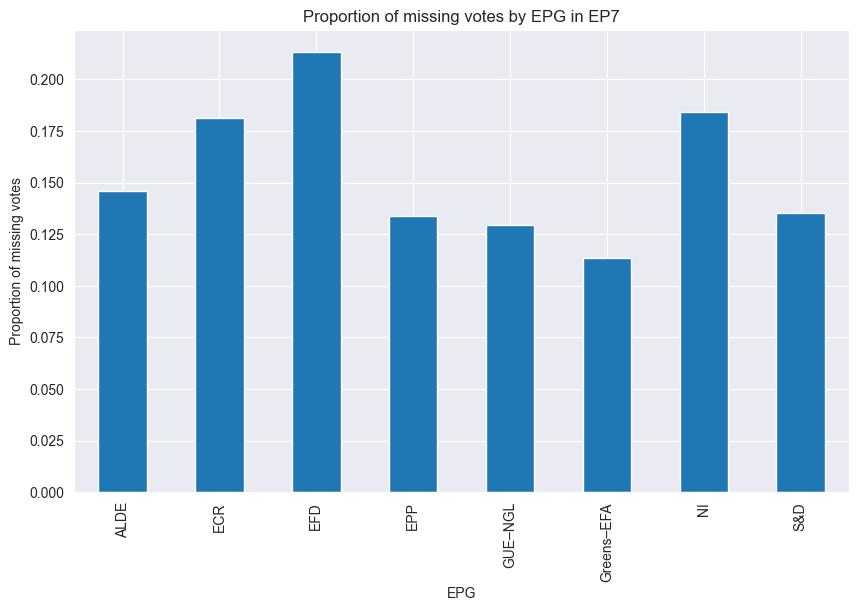

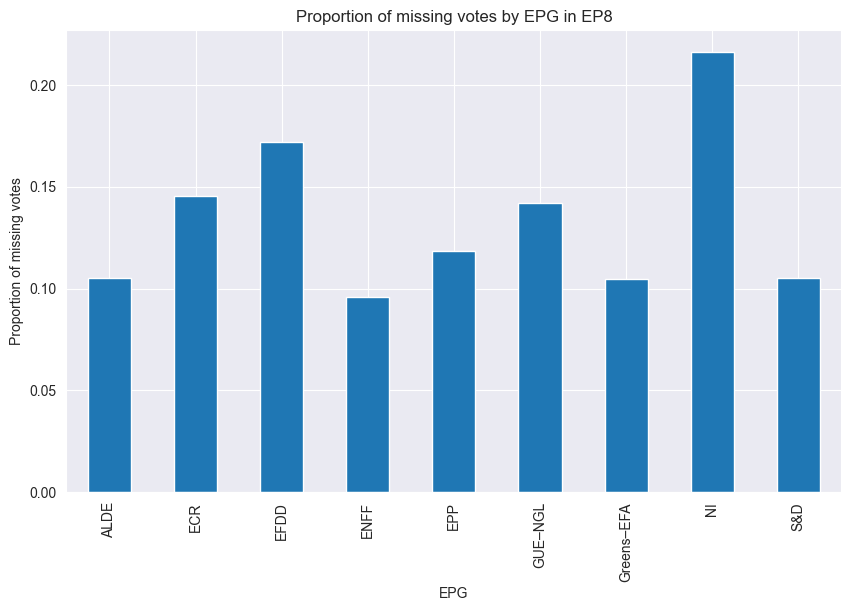

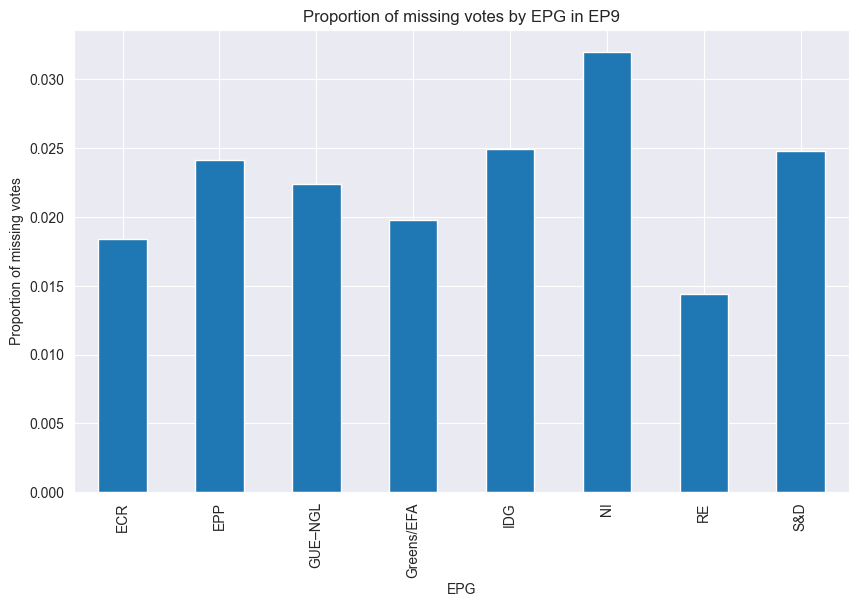

In [29]:
proportions_plot(vote6,6)
proportions_plot(vote7,7)
proportions_plot(vote8,8)
proportions_plot(vote9,9)


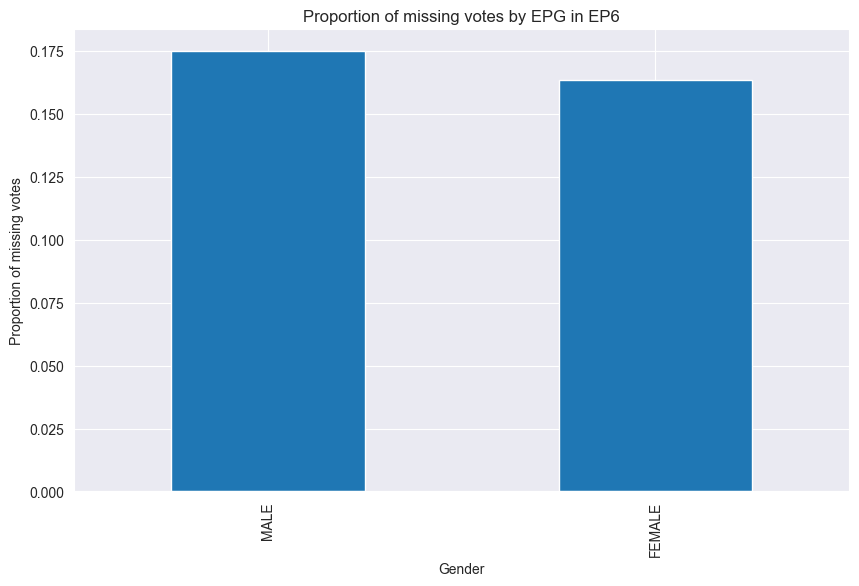

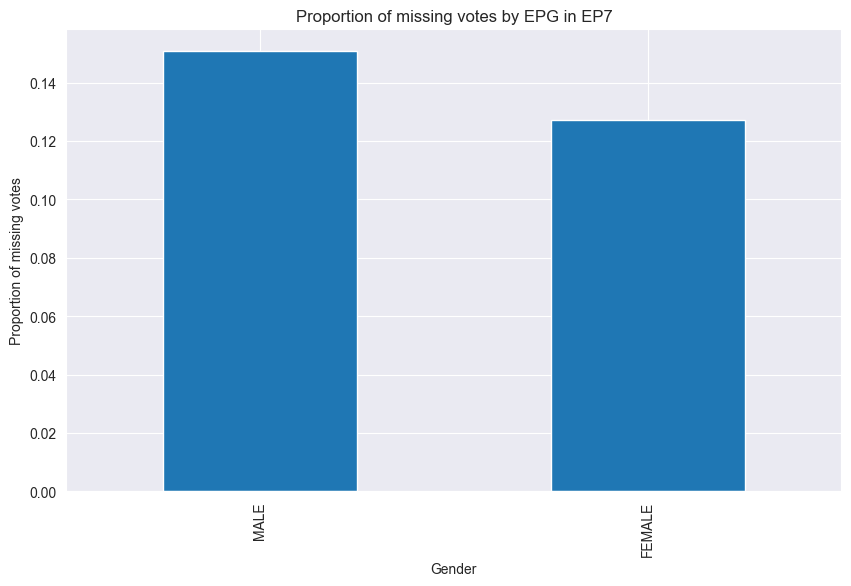

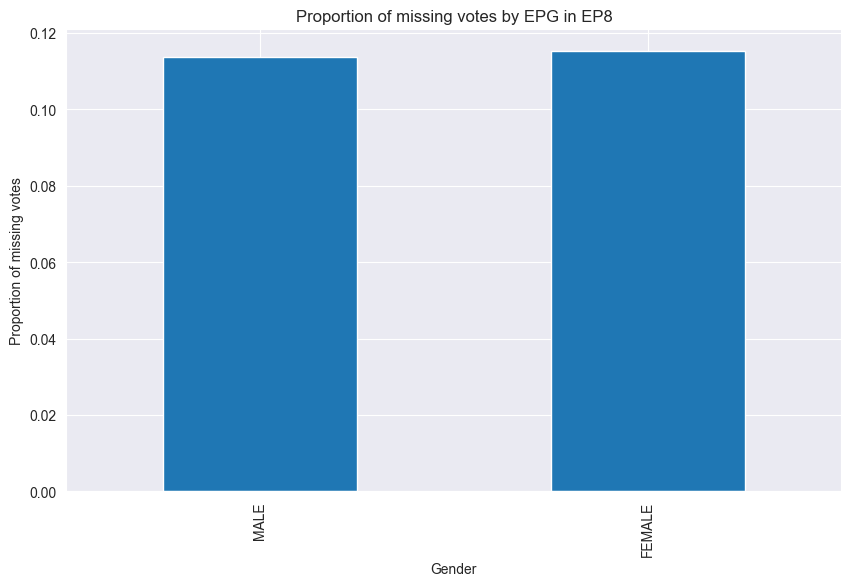

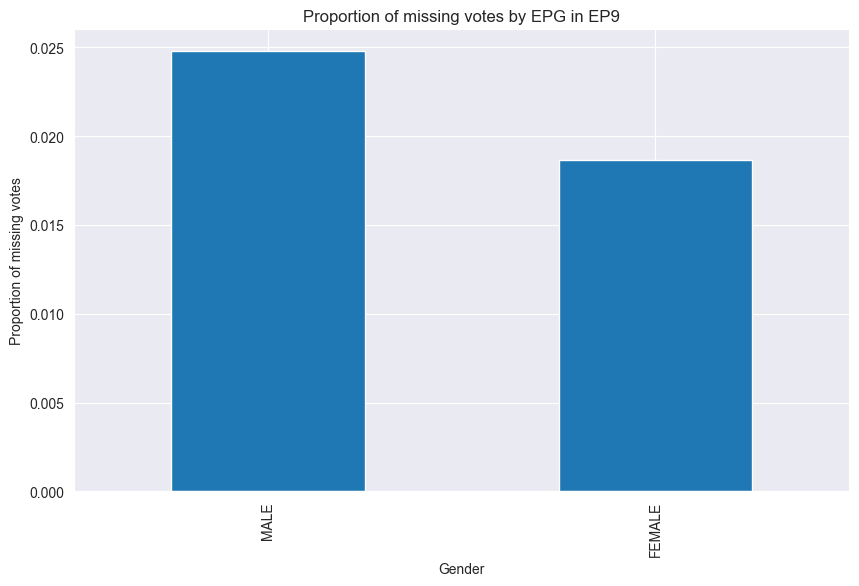

In [30]:
genders_plot(vote6,6)
genders_plot(vote7,7)
genders_plot(vote8,8)
genders_plot(vote9,9)

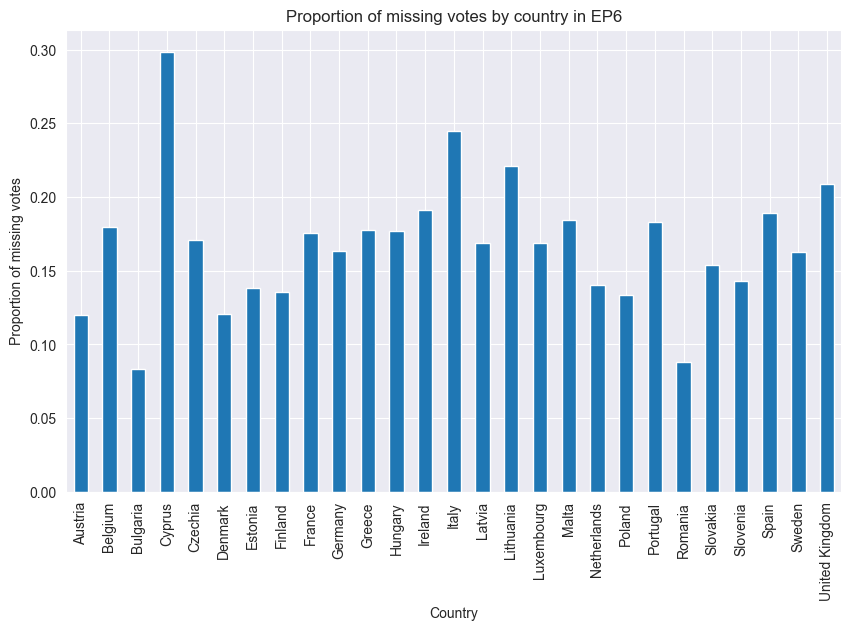

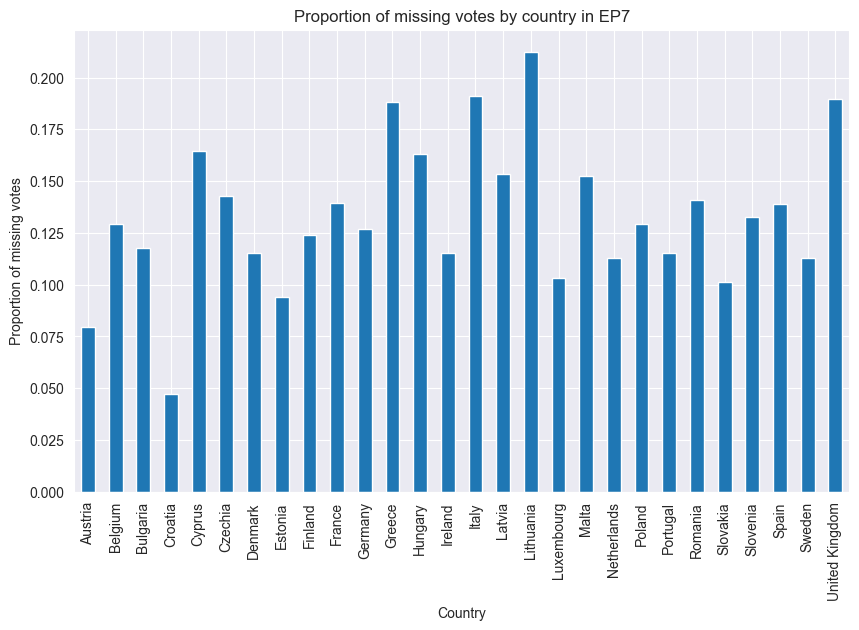

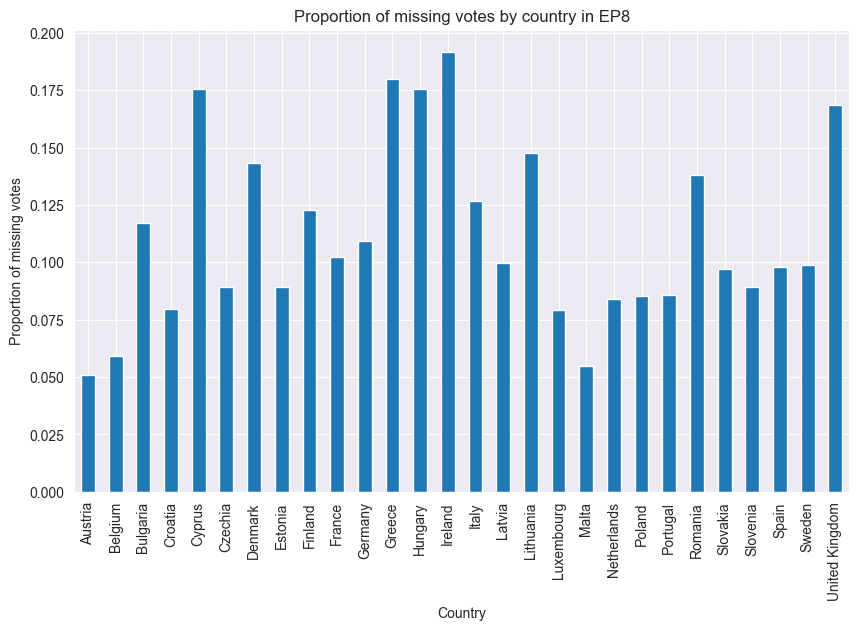

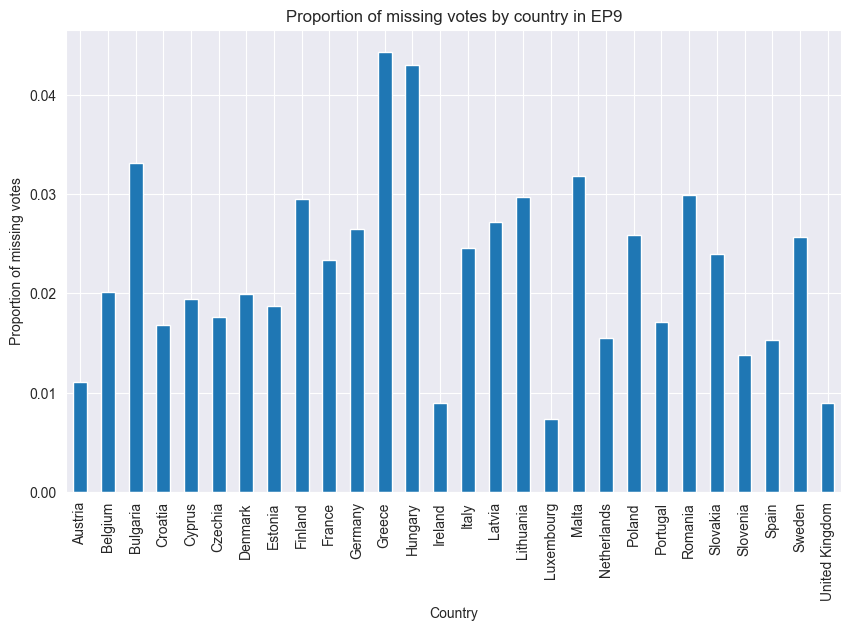

In [31]:
countries_plot(vote6,6)
countries_plot(vote7,7)
countries_plot(vote8,8)
countries_plot(vote9,9)

In [32]:
def heatmap(df, ep_number):
    
    df['MissingVote'] = df['Vote'] == 4
    pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Proportion of Missing Votes by Gender and EPG in EP{ep_number}')
    plt.savefig(os.path.join('Graphs',f'heatmap_proportion_of_missing_votes_by_gender_and_epg_EP{ep_number}.png'))
    plt.show()

In [33]:
def heatmap_country(df, ep_number):
    
    df['MissingVote'] = df['Vote'] == 4
    pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Proportion of Missing Votes by Country and EPG in EP{ep_number}')
    plt.savefig(os.path.join('Graphs',f'heatmap_proportion_of_missing_votes_by_country_and_epg_EP{ep_number}.png'))

    plt.show()

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\189427346.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)


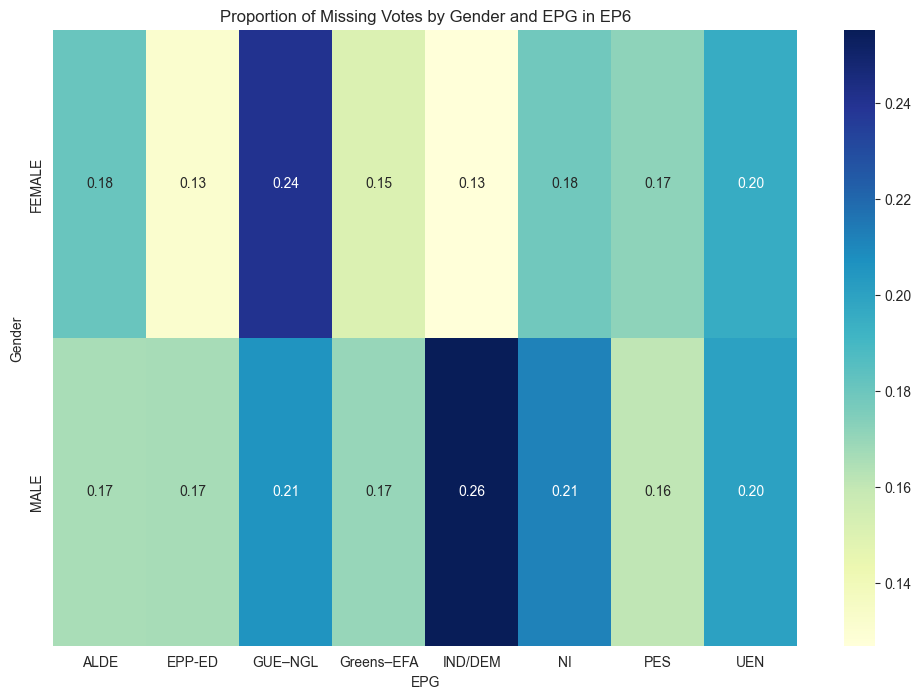

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\189427346.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)


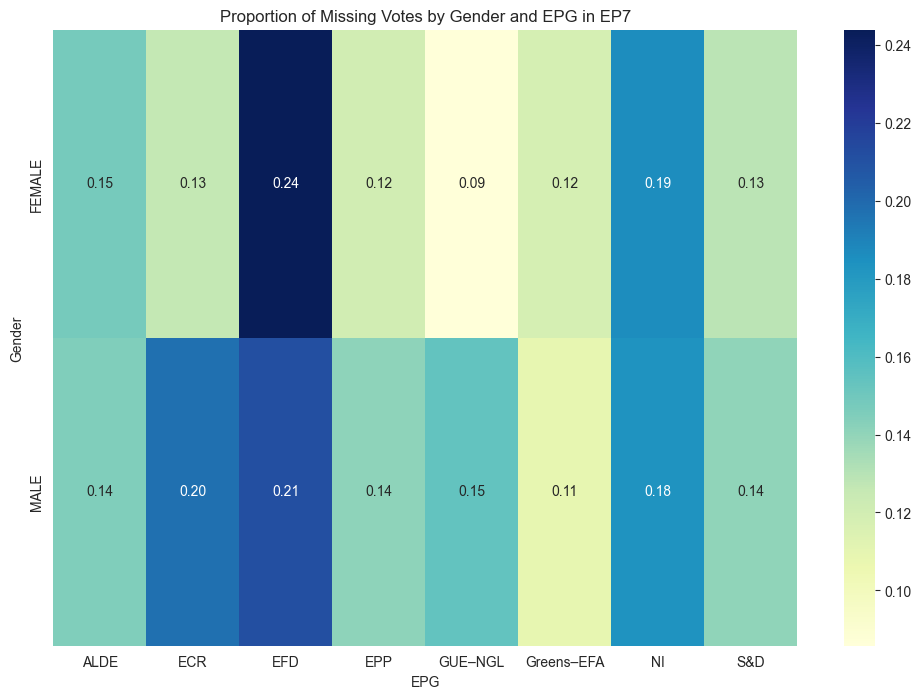

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\189427346.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)


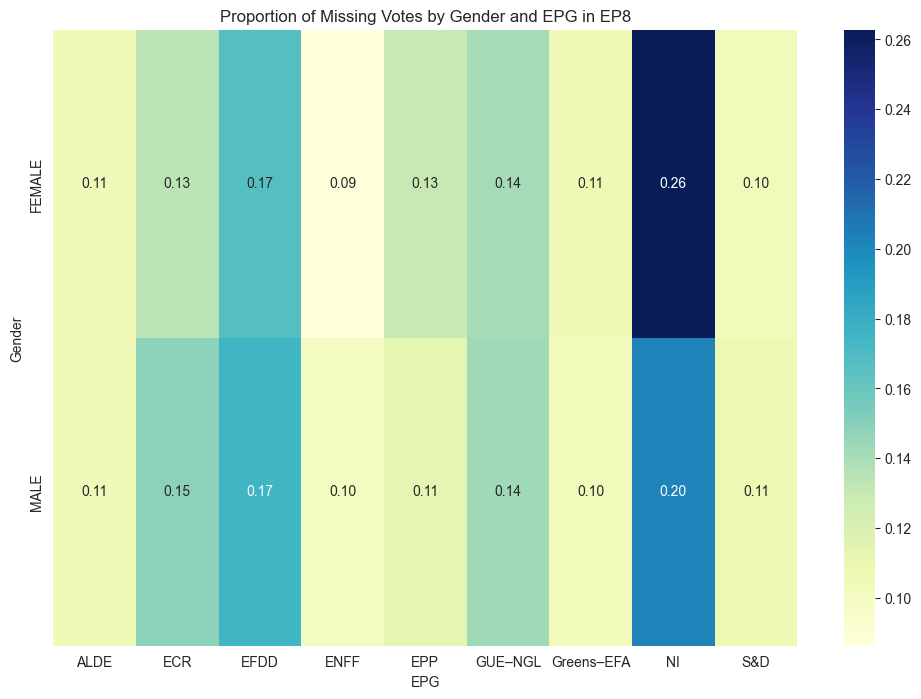

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\189427346.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Gender', columns='EPG', aggfunc=np.mean)


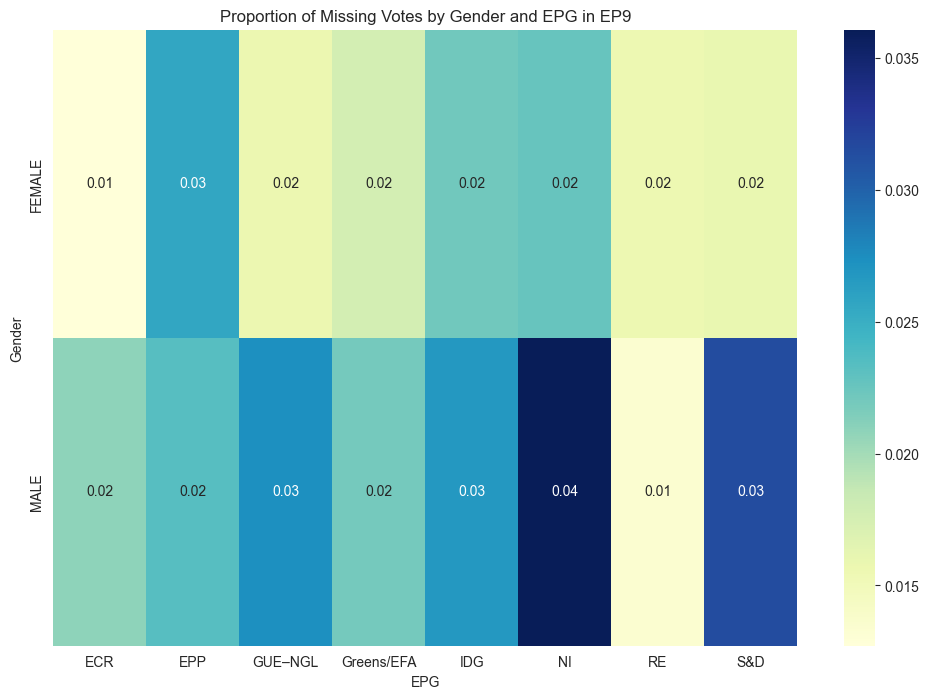

In [34]:
heatmap(vote6,6)
heatmap(vote7,7)
heatmap(vote8,8)
heatmap(vote9,9)

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\2085699517.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)


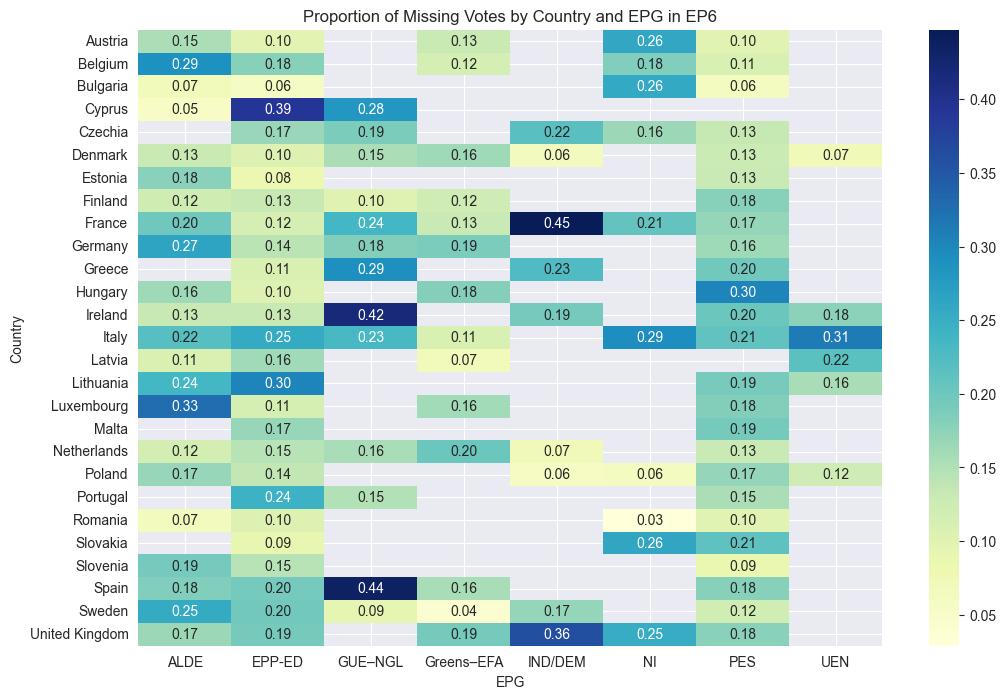

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\2085699517.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)


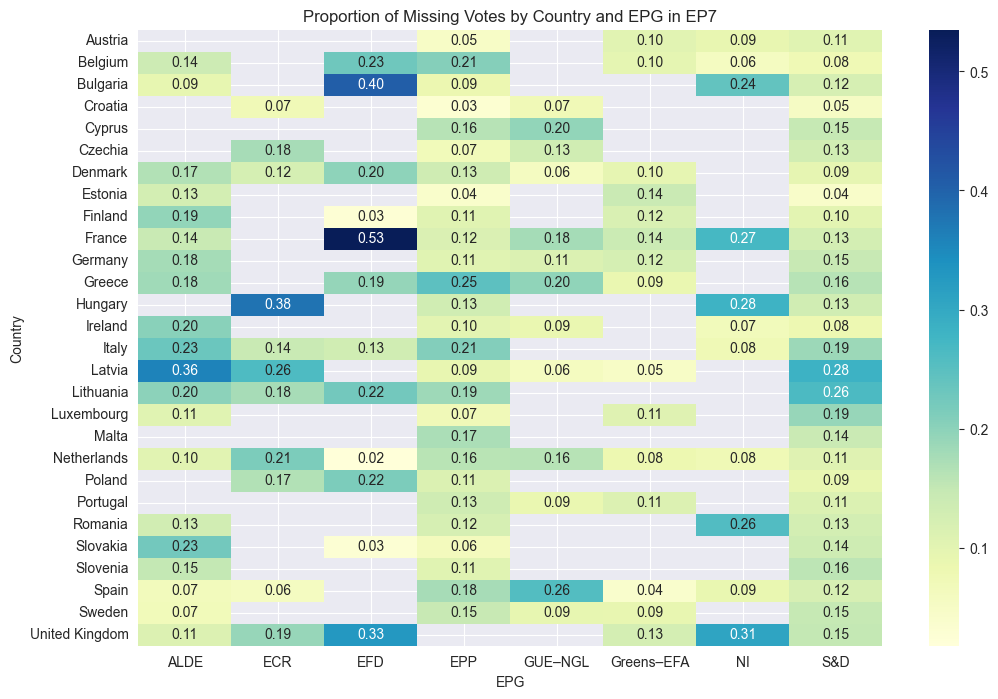

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\2085699517.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)


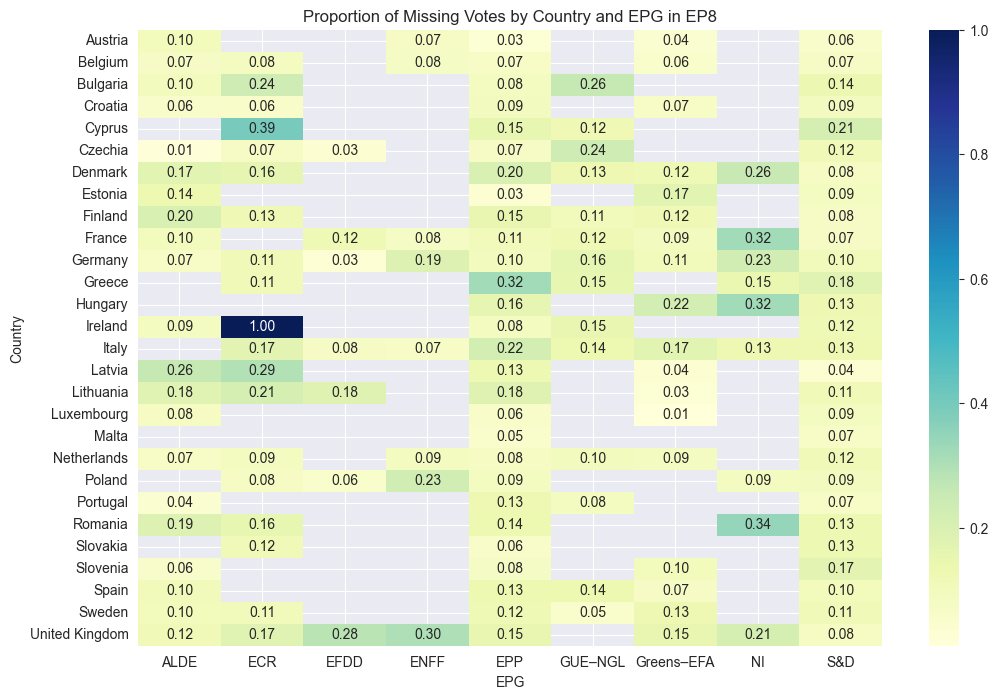

C:\Users\zwiad\AppData\Local\Temp\ipykernel_18576\2085699517.py:4: FutureWarning: The provided callable <function mean at 0x0000022A7146E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='MissingVote', index='Country', columns='EPG', aggfunc=np.mean)


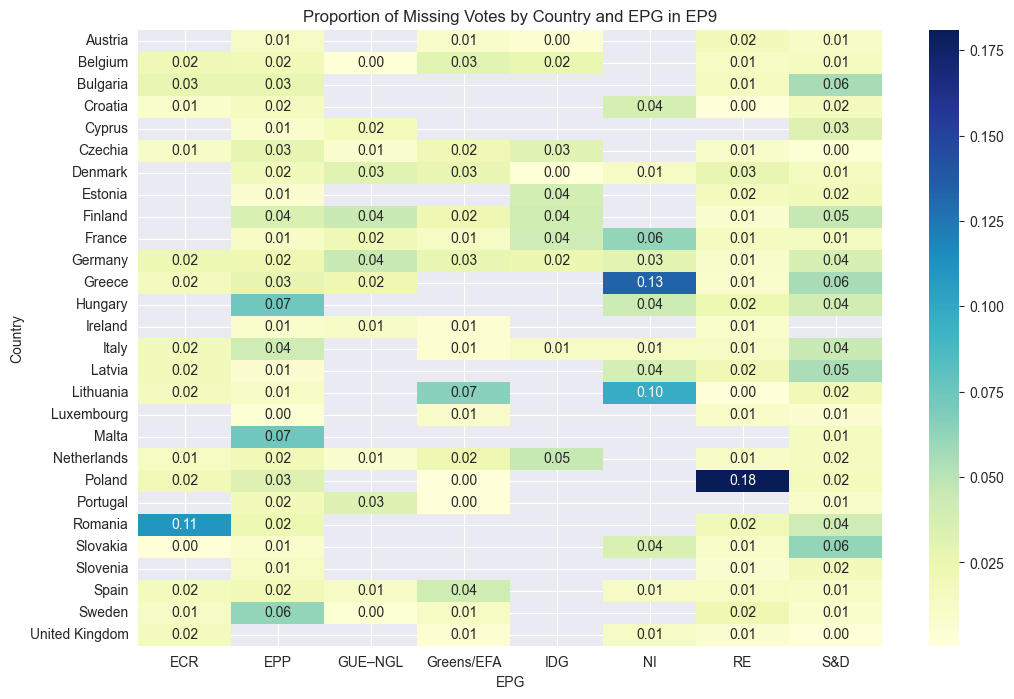

In [35]:
heatmap_country(vote6,6)
heatmap_country(vote7,7)
heatmap_country(vote8,8)
heatmap_country(vote9,9)